In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
draft_df = pd.read_csv('careers_df.csv')

In [3]:
draft_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2000.0,Rashard Anderson,Jackson State (MS),CB,74.4,206.0,4.59,NaN,34.0,123.0,...,2001.0,0.0,0.0,1.0,7.0,7.0,68.0,1.0,NaN,D
1,2000.0,Corey Atkins,South Carolina,OLB,72.4,237.0,4.76,21.0,31.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
2,2000.0,Reggie Austin,Wake Forest,CB,69.4,175.0,4.46,17.0,35.0,119.0,...,2002.0,0.0,0.0,0.0,2.0,2.0,18.0,2.0,NaN,D
3,2000.0,Rashidi Barnes,Colorado,FS,71.6,208.0,4.63,10.0,35.0,114.0,...,2000.0,0.0,0.0,0.0,1.0,1.0,15.0,NaN,NaN,D
4,2000.0,David Barrett,Arkansas,CB,69.9,199.0,4.48,16.0,37.5,116.0,...,2008.0,0.0,0.0,6.0,31.0,14.0,391.0,18.0,0.5,D


In [4]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1633 non-null   float64
 1   Name             1633 non-null   object 
 2   College          1632 non-null   object 
 3   POS              1633 non-null   object 
 4   Height (in)      1633 non-null   float64
 5   Weight (lbs)     1633 non-null   float64
 6   40 Yard          1409 non-null   float64
 7   Bench Press      1225 non-null   float64
 8   Vert Leap (in)   1237 non-null   float64
 9   Broad Jump (in)  1235 non-null   float64
 10  Shuttle          1038 non-null   float64
 11  3Cone            1030 non-null   float64
 12  Win-Loss Record  1460 non-null   object 
 13  Round            1122 non-null   float64
 14  Pick             1122 non-null   float64
 15  Team             1122 non-null   object 
 16  Age              1060 non-null   float64
 17  To            

In [5]:
draft_df.describe()

,Year,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Round,...,Age,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks
count,1633.000000,1633.000000,1633.000000,1409.000000,1225.000000,1237.000000,1235.000000,1038.000000,1030.000000,1122.000000,...,1060.000000,1050.000000,1122.000000,1122.000000,1122.000000,1050.000000,975.000000,1027.000000,540.000000,680.000000
mean,2005.524189,73.398616,239.093693,4.739084,20.955102,34.109135,115.369231,4.321985,7.235738,3.999109,...,22.580189,2010.596190,0.068627,0.286096,2.418004,19.168571,14.048205,170.105161,6.827778,12.063971
std,3.125960,2.217610,40.360148,0.237040,6.627861,3.854270,7.784872,0.236452,0.357441,1.954660,...,0.846134,4.460908,0.407025,1.020382,3.190776,20.684778,16.782542,180.672058,7.764027,18.939034
min,2000.000000,67.600000,168.000000,4.300000,2.000000,20.500000,86.000000,3.750000,6.340000,1.000000,...,20.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000
25%,2003.000000,71.880000,203.000000,4.560000,16.000000,31.500000,110.000000,4.150000,6.970000,2.000000,...,22.000000,2007.000000,0.000000,0.000000,0.000000,3.000000,2.000000,32.000000,1.000000,2.000000
50%,2006.000000,73.500000,236.000000,4.690000,21.000000,34.500000,116.000000,4.300000,7.190000,4.000000,...,23.000000,2011.000000,0.000000,0.000000,1.000000,11.000000,8.000000,108.000000,3.000000,5.000000
75%,2008.000000,75.000000,268.000000,4.900000,25.000000,37.000000,121.000000,4.460000,7.460000,6.000000,...,23.000000,2014.000000,0.000000,0.000000,4.000000,31.000000,19.000000,250.000000,10.000000,13.000000
max,2010.000000,79.750000,351.000000,5.710000,45.000000,46.000000,136.000000,5.060000,8.750000,7.000000,...,26.000000,2020.000000,5.000000,9.000000,15.000000,102.000000,98.000000,995.000000,51.000000,138.500000


In [6]:
draft_df.shape

(1633, 27)

In [7]:
draft_df['Broad Jump (in)'].replace(np.nan, np.mean(draft_df['Broad Jump (in)']), inplace=True)
draft_df['Bench Press'].replace(np.nan, np.mean(draft_df['Bench Press']), inplace=True)
draft_df['40 Yard'].replace(np.nan, np.mean(draft_df['40 Yard']), inplace=True)
draft_df['Vert Leap (in)'].replace(np.nan, np.mean(draft_df['Vert Leap (in)']), inplace=True)
draft_df['Shuttle'].replace(np.nan, np.mean(draft_df['Shuttle']), inplace=True)
draft_df['3Cone'].replace(np.nan, np.mean(draft_df['3Cone']), inplace=True)

In [8]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1633 non-null   float64
 1   Name             1633 non-null   object 
 2   College          1632 non-null   object 
 3   POS              1633 non-null   object 
 4   Height (in)      1633 non-null   float64
 5   Weight (lbs)     1633 non-null   float64
 6   40 Yard          1633 non-null   float64
 7   Bench Press      1633 non-null   float64
 8   Vert Leap (in)   1633 non-null   float64
 9   Broad Jump (in)  1633 non-null   float64
 10  Shuttle          1633 non-null   float64
 11  3Cone            1633 non-null   float64
 12  Win-Loss Record  1460 non-null   object 
 13  Round            1122 non-null   float64
 14  Pick             1122 non-null   float64
 15  Team             1122 non-null   object 
 16  Age              1060 non-null   float64
 17  To            

In [9]:
draft_df['Drafted'] = draft_df.Drafted.replace(['D', 'U'], [1, 0])
draft_df.Drafted.unique()

array([1, 0], dtype=int64)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
y = draft_df.Drafted
X = draft_df[['Height (in)', 'Weight (lbs)', '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
params = [0.001, 0.01, 0.1, 1, 10, 100]

accuracies = {}

for i in params:
    lr = LogisticRegression(C= i, random_state= 42)
    lr.fit(X_train, y_train)
    
    y_lr_pred = lr.predict(X_test)
    
    acc_score = accuracy_score(y_test, y_lr_pred)
    accuracies[i] = acc_score
accuracies

{0.001: 0.6797066014669927,
 0.01: 0.6894865525672371,
 0.1: 0.7188264058679706,
 1: 0.7017114914425427,
 10: 0.6992665036674817,
 100: 0.6992665036674817}

In [27]:
lr2 = LogisticRegression(C=0.1)
lr2.fit(X_train, y_train)
lr_matrix = confusion_matrix(y_test, y_lr_pred)
print(lr_matrix)
lr_accuracy = lr2.score(X_test, y_test)
print(lr_accuracy)

[[ 28 103]
 [ 20 258]]
0.7188264058679706


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_knn_predict = knn.predict(X_test)

knn_matrix = confusion_matrix(y_test, y_knn_predict)
print(knn_matrix)

knn_accuracy = knn.score(X_test, y_test)
print(knn_accuracy)

[[ 12 119]
 [  3 275]]
0.7017114914425427


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
estimators = [10, 25, 50, 75, 100]

rf_scores = {}

for i in estimators:
    rf = RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=42 )
    rf.fit(X_train, y_train)
    
    y_rf_predict = rf.predict(X_test)
    
    acc_rf_score = accuracy_score(y_test, y_rf_predict)
    rf_scores[i] = acc_rf_score
rf_scores

{10: 0.6454767726161369,
 25: 0.6919315403422983,
 50: 0.687041564792176,
 75: 0.684596577017115,
 100: 0.6943765281173594}

In [50]:
rf2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf2.fit(X_train, y_train)
rf_matrix = confusion_matrix(y_test, y_rf_predict)
print(rf_matrix)

rf_accuracy = rf2.score(X_test, y_test)
print(rf_accuracy)

[[ 42  89]
 [ 36 242]]
0.6943765281173594


# Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_gb_predict = gb.predict(X_test)

gb_matrix = confusion_matrix(y_test, y_gb_predict)
print(gb_matrix)

gb_accuracy = gb.score(X_test, y_test)
print(gb_accuracy)

[[ 38  93]
 [ 19 259]]
0.726161369193154


# Parameter Tuning Random Forest

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {'criterion': ['gini', 'entropy'], 'n_estimators': [50, 100, 150, 200, 250], 'min_samples_split': [2, 5, 8, 10]}

rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5)

rf_gs = rf_gs.fit(X_train, y_train)

print(rf_gs.best_estimator_)
print(rf_gs.best_score_)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=250, random_state=42)
0.7017965874874539


In [56]:
rf_final = RandomForestClassifier(n_estimators=250, criterion='entropy', min_samples_split=5, random_state=42)
rf_final.fit(X_train, y_train)
y_rf_finalpredict = rf_final.predict(X_test)

rf_finalacc = accuracy_score(y_test, y_rf_finalpredict)

print(rf_finalacc)

0.6919315403422983


In [69]:
cv_score_rf_train = cross_val_score(rf_final, X_train, y_train, cv=5, scoring='roc_auc')
cv_score_rf_test = cross_val_score(rf_final, X_test, y_test, cv=5, scoring='roc_auc')
print(cv_score_rf_train)
print(cv_score_rf_test)

cv_score_rf_train_mean = cv_score_rf_train.mean()
cv_score_rf_test_mean = cv_score_rf_test.mean()

print('Mean cross val score for train: ' + str(cv_score_rf_train_mean))
print('Mean cross val score for test: ' + str(cv_score_rf_test_mean))

[0.6754905  0.6701962  0.66466833 0.700327   0.6773183 ]
[0.62558923 0.65247253 0.68956044 0.65315934 0.65874126]
Mean cross val score for train: 0.6776000652518871
Mean cross val score for test: 0.6559045584045584


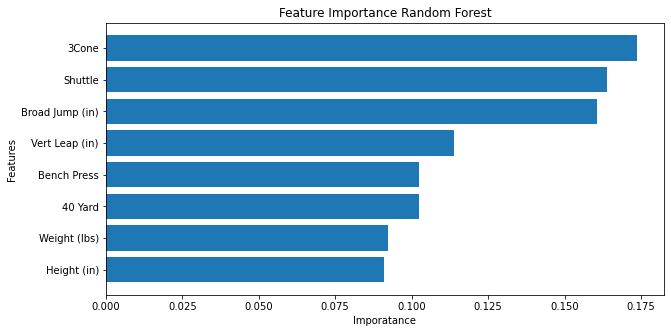

In [60]:
features = X
importances = list(rf_final.feature_importances_)
sort_import = np.sort(importances)

plt.figure(figsize=(10, 5))
index = [0,1,2, 3, 4, 5, 6, 7]
_ = plt.barh(index, sort_import, align='center')
plt.xlabel('Imporatance')
plt.yticks(index, features)
plt.ylabel('Features')
plt.title('Feature Importance Random Forest')
plt.show()

In [71]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_rf_score = rf_final.predict_proba(X_test)
y_rf_score = y_rf_score[:,1]

auroc_rf = roc_auc_score(y_test, y_rf_score)
print("ROC-AUC Score for Random Forest:", auroc_rf)

ROC-AUC Score for Random Forest: 0.6936130484925036


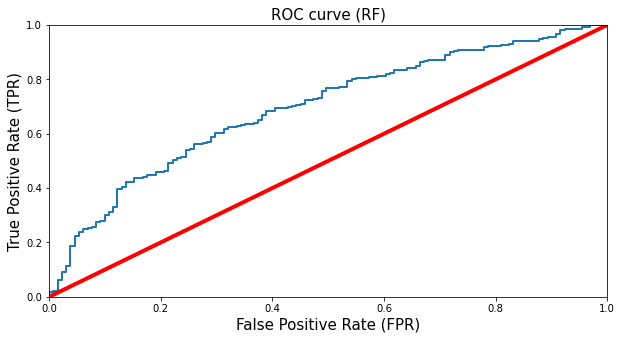

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf_score)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(fpr, tpr)
plt.savefig("30.png")
plt.show()

#  Parameter Tuning Gradient Boosting

In [62]:
gb = GradientBoostingClassifier()
param_grid_gb = {'loss': ['deviance', 'exponential'], 'learning_rate':[0.05, 0.1, 0.25, 0.5, 0.75, 1], 'n_estimators':[100, 150, 200, 250], 
                'min_samples_split': [2, 5, 8, 10], 'max_depth':[3, 6, 9]}

gb_gs = GridSearchCV(gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
gb_gs.fit(X_train, y_train)

print(gb_gs.best_estimator_)
print(gb_gs.best_score_)

GradientBoostingClassifier(learning_rate=0.05, loss='exponential',
                           min_samples_split=5)
0.7058815657410504


In [63]:
gb_Final = GradientBoostingClassifier(learning_rate=0.05, loss='exponential', min_samples_split=5)
gb_Final.fit(X_train, y_train)

y_gb_finalpredict = gb_Final.predict(X_test)

gb_finalacc = accuracy_score(y_test, y_gb_finalpredict)

print(gb_finalacc)

0.7114914425427873


In [70]:
cv_score_gb_train = cross_val_score(gb_Final, X_train, y_train, cv=5, scoring='roc_auc')
cv_score_gb_test = cross_val_score(gb_Final, X_test, y_test, cv=5, scoring='roc_auc')
print(cv_score_gb_train)
print(cv_score_gb_test)

cv_score_gb_train_mean = cv_score_gb_train.mean()
cv_score_gb_test_mean = cv_score_gb_test.mean()

print('Mean cross val score for train: ' + str(cv_score_gb_train_mean))
print('Mean cross val score for test: ' + str(cv_score_gb_test_mean))

[0.67821551 0.68997197 0.67572407 0.65162722 0.62406015]
[0.63265993 0.69402473 0.63907967 0.66964286 0.72762238]
Mean cross val score for train: 0.6639197846687724
Mean cross val score for test: 0.6726059126059126


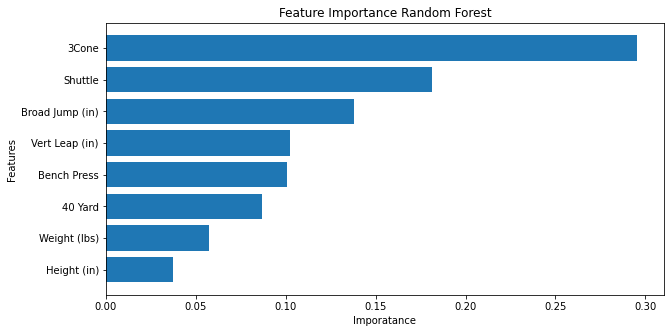

In [65]:
features = X
importances = list(gb_Final.feature_importances_)
sort_import = np.sort(importances)

plt.figure(figsize=(10, 5))
index = [0,1,2, 3, 4, 5, 6, 7]
_ = plt.barh(index, sort_import, align='center')
plt.xlabel('Imporatance')
plt.yticks(index, features)
plt.ylabel('Features')
plt.title('Feature Importance Random Forest')
plt.show()

In [75]:
y_gb_score = gb_Final.predict_proba(X_test)
y_gb_score = y_gb_score[:,1]

auroc_gb = roc_auc_score(y_test, y_gb_score)
print("ROC-AUC Score for Random Forest:", auroc_gb)

ROC-AUC Score for Random Forest: 0.7190263056730188


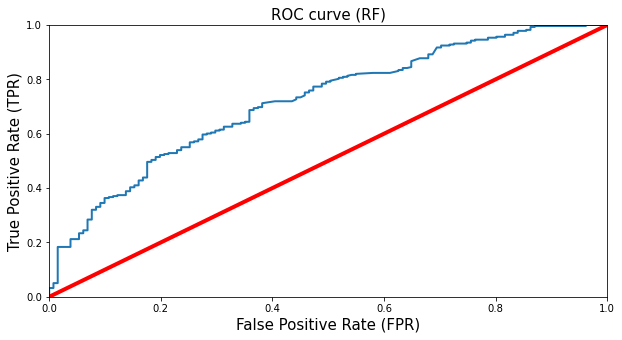

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_gb_score)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(fpr, tpr)
plt.savefig("30.png")
plt.show()